In [9]:
# --- Task 1: EDA & Preprocessing for MLR ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('D:\\Excelr\\ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [10]:
# Rename columns for clarity
df.rename(columns={"Age_08_04": "Age", "cc": "CC", "Fuel_Type": "FuelType"}, inplace=True)

# ---- Basic Info ----
print("Dataset Info:")
print(df.info(), "\n")

print("Missing Values:")
print(df.isnull().sum(), "\n")

print("Summary Statistics:")
print(df.describe(), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   CC         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None 

Missing Values:
Price        0
Age          0
KM           0
FuelType     0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64 

Summary Statistics:
              Price          Age             KM           HP    Automatic  \
count   1436.000000

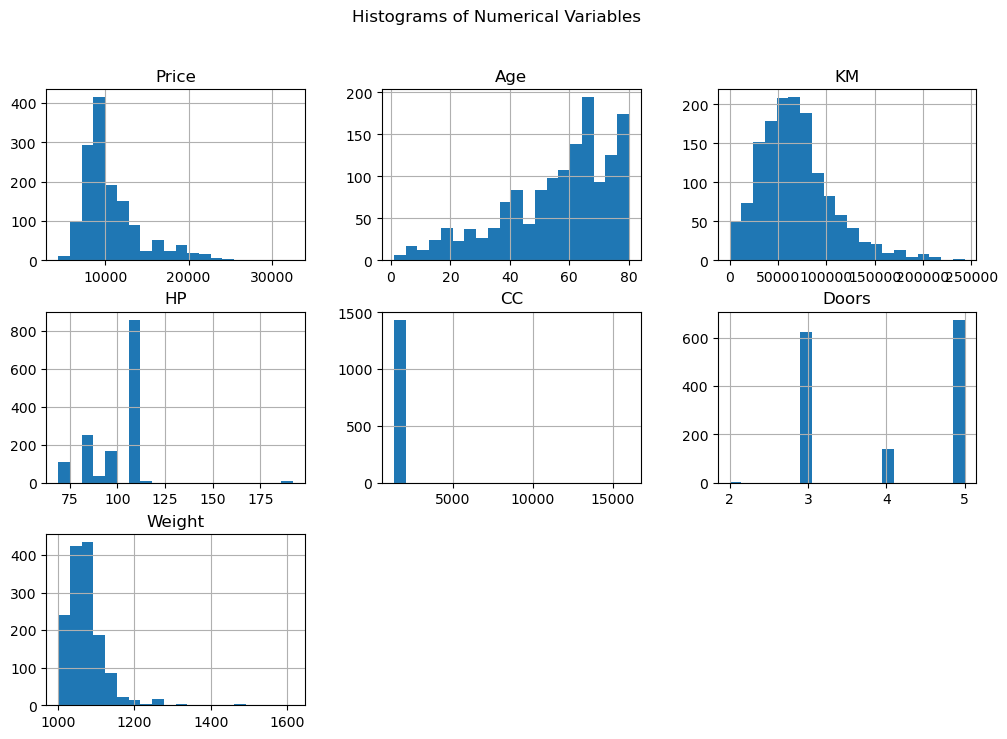

In [11]:
# ---- Histograms for numerical variables ----
num_cols = ["Price", "Age", "KM", "HP", "CC", "Doors", "Weight"]
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

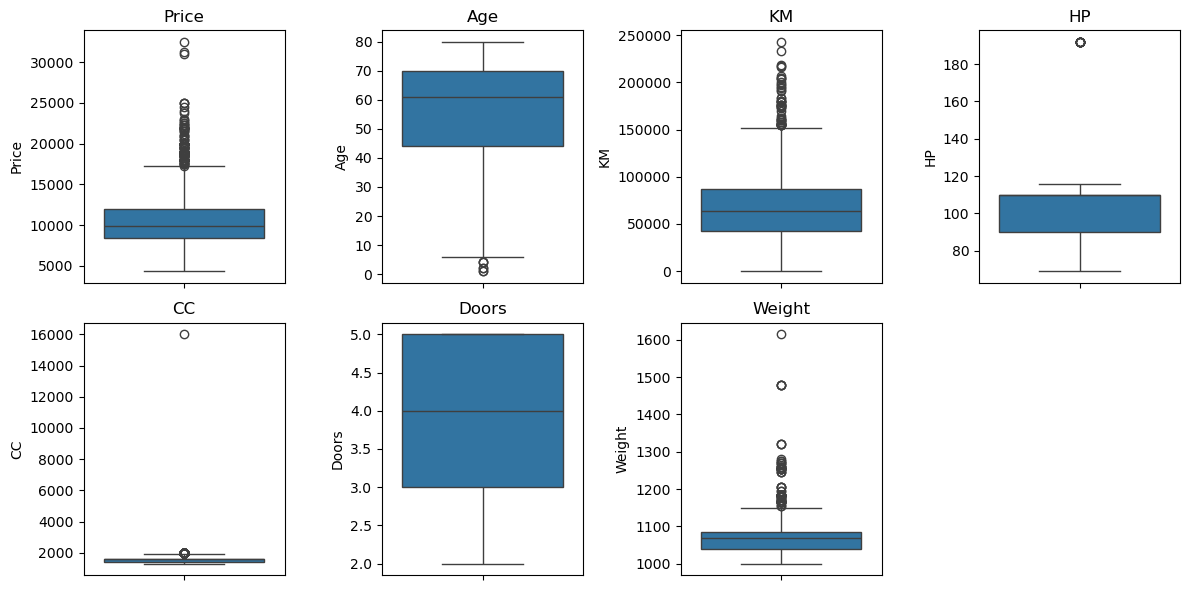

In [12]:
# ---- Boxplots to detect outliers ----
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

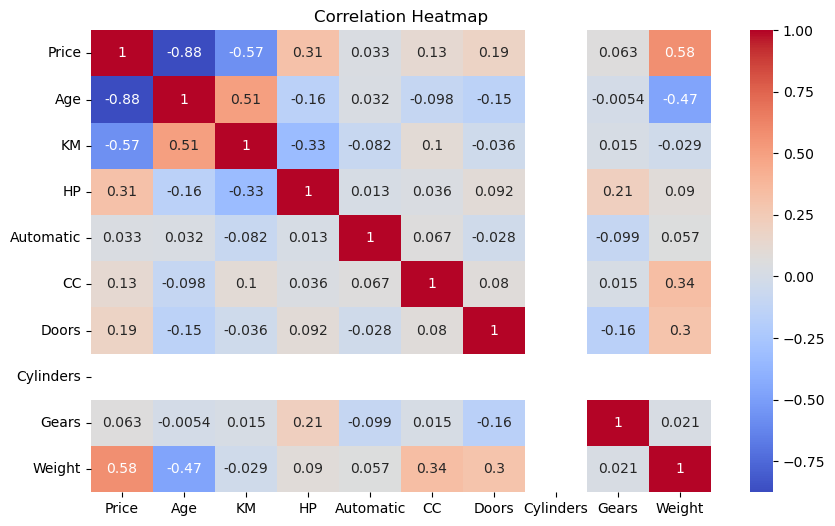

In [13]:
# ---- Correlation Heatmap ----
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

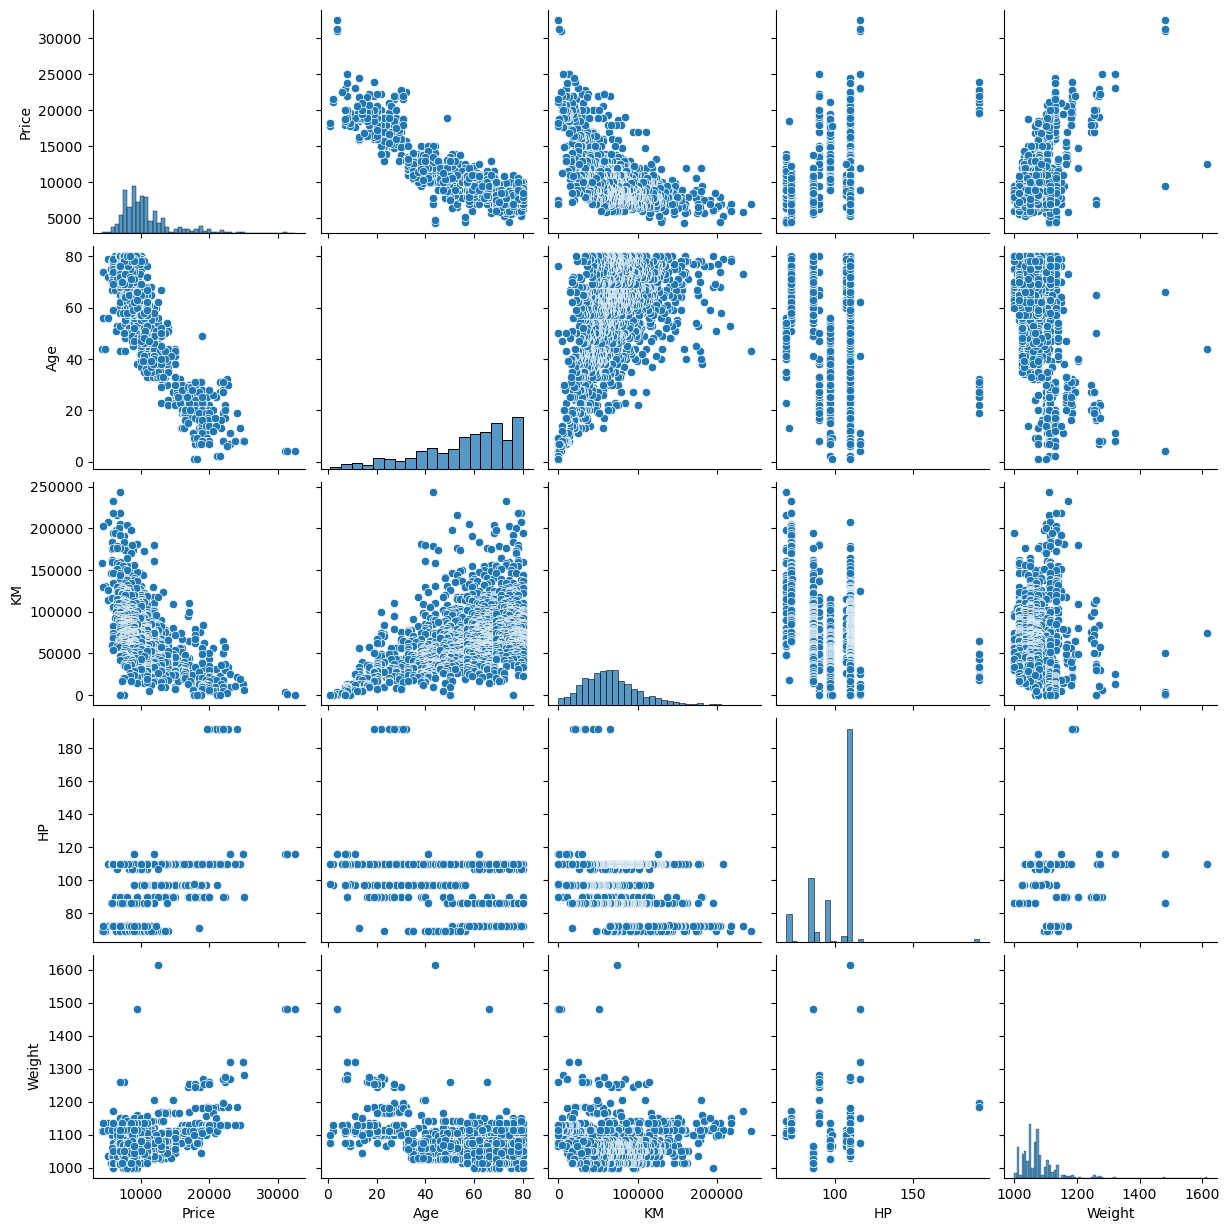

In [14]:
# ---- Pairplot for important variables ----
sns.pairplot(df[["Price", "Age", "KM", "HP", "Weight"]])
plt.show()


In [16]:
# ---- Preprocessing: One-hot encode categorical FuelType ----
df_encoded = pd.get_dummies(df, columns=["FuelType"], drop_first=True)
df_encoded

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [17]:
print("After Encoding FuelType:")
print(df_encoded.head(), "\n")


After Encoding FuelType:
   Price  Age     KM  HP  Automatic    CC  Doors  Cylinders  Gears  Weight  \
0  13500   23  46986  90          0  2000      3          4      5    1165   
1  13750   23  72937  90          0  2000      3          4      5    1165   
2  13950   24  41711  90          0  2000      3          4      5    1165   
3  14950   26  48000  90          0  2000      3          4      5    1165   
4  13750   30  38500  90          0  2000      3          4      5    1170   

   FuelType_Diesel  FuelType_Petrol  
0             True            False  
1             True            False  
2             True            False  
3             True            False  
4             True            False   



In [22]:
# ---- Standardization (for regression models later) ----
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Feature Matrix Shape:", X_scaled.shape)

Scaled Feature Matrix Shape: (1436, 11)


In [24]:
from sklearn.model_selection import train_test_split
# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 1148
Testing set size: 288


In [38]:
# Model 1: Use all features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


mlr1 = LinearRegression()
mlr1.fit(X_train, y_train)

# Predictions
y_pred1 = mlr1.predict(X_test)

# Evaluation
print("Model 1 (All Features):")
print("R² Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

Model 1 (All Features):
R² Score: 0.8348888040611082
RMSE: 1484.2654153296517


In [39]:
# Coefficients interpretation
coeff_df1 = pd.DataFrame({
    "Feature": df_encoded.drop("Price", axis=1).columns,
    "Coefficient": mlr1.coef_
})
print(coeff_df1)

            Feature   Coefficient
0               Age -2.246662e+03
1                KM -6.085706e+02
2                HP  2.102533e+02
3         Automatic  3.413608e+01
4                CC -1.288507e+01
5             Doors -5.743684e+01
6         Cylinders  2.842171e-13
7             Gears  1.039463e+02
8            Weight  1.362139e+03
9   FuelType_Diesel -2.127088e+01
10  FuelType_Petrol  4.451027e+02


In [40]:
# Add log(KM) feature
df_fe = df_encoded.copy()
df_fe["log_KM"] = np.log(df_fe["KM"] + 1)

X3 = df_fe.drop("Price", axis=1)
y3 = df_fe["Price"]

X3_scaled = scaler.fit_transform(X3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)

mlr3 = LinearRegression()
mlr3.fit(X_train3, y_train3)

y_pred3 = mlr3.predict(X_test3)

print("\nModel 3 (Feature Engineering - log(KM)):")
print("R² Score:", r2_score(y_test3, y_pred3))
print("RMSE:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

coeff_df3 = pd.DataFrame({
    "Feature": X3.columns,
    "Coefficient": mlr3.coef_
})
print(coeff_df3)



Model 3 (Feature Engineering - log(KM)):
R² Score: 0.8347956654795817
RMSE: 1484.6839904741387
            Feature   Coefficient
0               Age -2.239673e+03
1                KM -5.859062e+02
2                HP  2.134245e+02
3         Automatic  3.497355e+01
4                CC -1.271934e+01
5             Doors -5.671912e+01
6         Cylinders -5.684342e-14
7             Gears  1.042789e+02
8            Weight  1.355964e+03
9   FuelType_Diesel -1.860293e+01
10  FuelType_Petrol  4.456970e+02
11           log_KM -3.982699e+01


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
results = []

# --- Model 1: All Features ---
X1 = df_encoded.drop("Price", axis=1)
y1 = df_encoded["Price"]

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

mlr1 = LinearRegression().fit(X_train1, y_train1)
y_pred1 = mlr1.predict(X_test1)

results.append({"Model":"Model 1 (All Features)",
                "R2": r2_score(y_test1, y_pred1),
                "RMSE": np.sqrt(mean_squared_error(y_test1, y_pred1)),
                "MAE": mean_absolute_error(y_test1, y_pred1)})


# --- Model 2: Reduced Features (drop Doors, CC) ---
X2 = df_encoded.drop(["Price", "Doors", "CC"], axis=1)
y2 = df_encoded["Price"]

X2_scaled = scaler.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

mlr2 = LinearRegression().fit(X_train2, y_train2)
y_pred2 = mlr2.predict(X_test2)

results.append({"Model":"Model 2 (Reduced Features)",
                "R2": round(r2_score(y_test2, y_pred2),2),
                "RMSE":round(np.sqrt(mean_squared_error(y_test2, y_pred2)),2),
                "MAE": round(mean_absolute_error(y_test2, y_pred2),2)})

results

[{'Model': 'Model 1 (All Features)',
  'R2': 0.8348888040611082,
  'RMSE': np.float64(1484.2654153296517),
  'MAE': 990.8872739193968},
 {'Model': 'Model 2 (Reduced Features)',
  'R2': 0.84,
  'RMSE': np.float64(1479.18),
  'MAE': 996.91}]

In [55]:
# --- Results DataFrame ---
results_df = pd.DataFrame(results)
print(results_df)

                        Model        R2         RMSE         MAE
0      Model 1 (All Features)  0.834889  1484.265415  990.887274
1  Model 2 (Reduced Features)  0.840000  1479.180000  996.910000


In [78]:
from sklearn.linear_model import Ridge, Lasso
results =[]
# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)   # alpha = regularization strength
ridge.fit(X_train1, y_train1)
y_pred_ridge = ridge.predict(X_test1)

ridge_results = {
    "Model": "Ridge Regression",
    "R2": round(r2_score(y_test1, y_pred_ridge), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y_test1, y_pred_ridge)), 2),
    "MAE": round(mean_absolute_error(y_test1, y_pred_ridge), 2)
}

# --- Lasso Regression ---
lasso = Lasso(alpha=0.01)  # small alpha avoids underfitting
lasso.fit(X_train1, y_train1)
y_pred_lasso = lasso.predict(X_test1)

lasso_results = {
    "Model": "Lasso Regression",
    "R2": round(r2_score(y_test1, y_pred_lasso), 2),
    "RMSE": round(np.sqrt(mean_squared_error(y_test1, y_pred_lasso)), 2),
    "MAE": round(mean_absolute_error(y_test1, y_pred_lasso), 2)
}

# --- Add to results table ---
results.append(ridge_results)
results.append(lasso_results)

results


[{'Model': 'Ridge Regression',
  'R2': 0.84,
  'RMSE': np.float64(1483.47),
  'MAE': 990.87},
 {'Model': 'Lasso Regression',
  'R2': 0.83,
  'RMSE': np.float64(1484.25),
  'MAE': 990.89}]

In [79]:
results_df = pd.DataFrame(results)
print(results_df)


              Model    R2     RMSE     MAE
0  Ridge Regression  0.84  1483.47  990.87
1  Lasso Regression  0.83  1484.25  990.89


In [80]:
'''
Normalization: Technique to scale data into a fixed range, usually 0 to 1. Useful when features have different scales and you want to bring them to
the same level.

Standardization: Technique to rescale data so that it has mean = 0 and standard deviation = 1. Useful when data follows (or is assumed to follow) a 
normal distribution.

Why helpful: Both methods prevent features with large values from dominating the model, improve model performance, and are especially important in 
regression and regularization methods (Ridge, Lasso).'''

'\nNormalization: Technique to scale data into a fixed range, usually 0 to 1. Useful when features have different scales and you want to bring them to\nthe same level.\n\nStandardization: Technique to rescale data so that it has mean = 0 and standard deviation = 1. Useful when data follows (or is assumed to follow) a \nnormal distribution.\n\nWhy helpful: Both methods prevent features with large values from dominating the model, improve model performance, and are especially important in \nregression and regularization methods (Ridge, Lasso).'